# Time Series

In [1]:
%%capture
import datetime
import pandas as pd
import matplotlib.pyplot as plt

from data_describe.core.time_series import plot_time_series, stationarity_test, plot_autocorrelation

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv")
df['Date'] = pd.to_datetime(df.Date, unit='ns')
df.set_index("Date", inplace=True)
df.head(2)

,Births
Date,
1959-01-01,35
1959-01-02,32


In [3]:
df['ex'] = df['Births'] * 1.16
df.head()

,Births,ex
Date,,
1959-01-01,35,40.60
1959-01-02,32,37.12
1959-01-03,30,34.80
1959-01-04,31,35.96
1959-01-05,44,51.04


## Plot time series

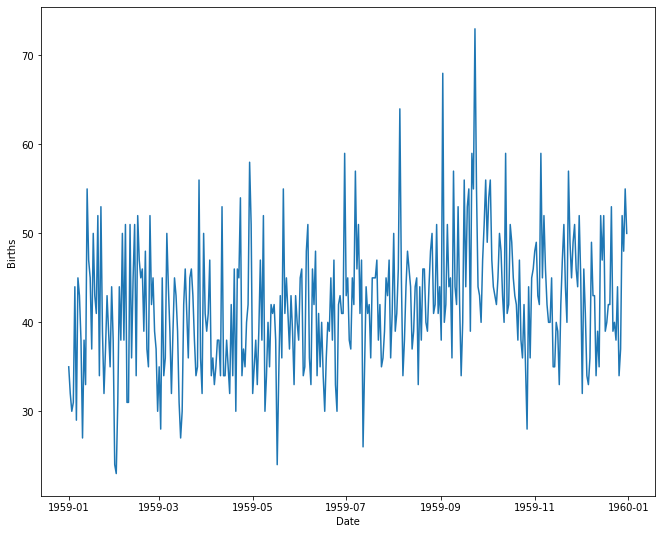

In [4]:
plot_time_series(df, cols="Births" )

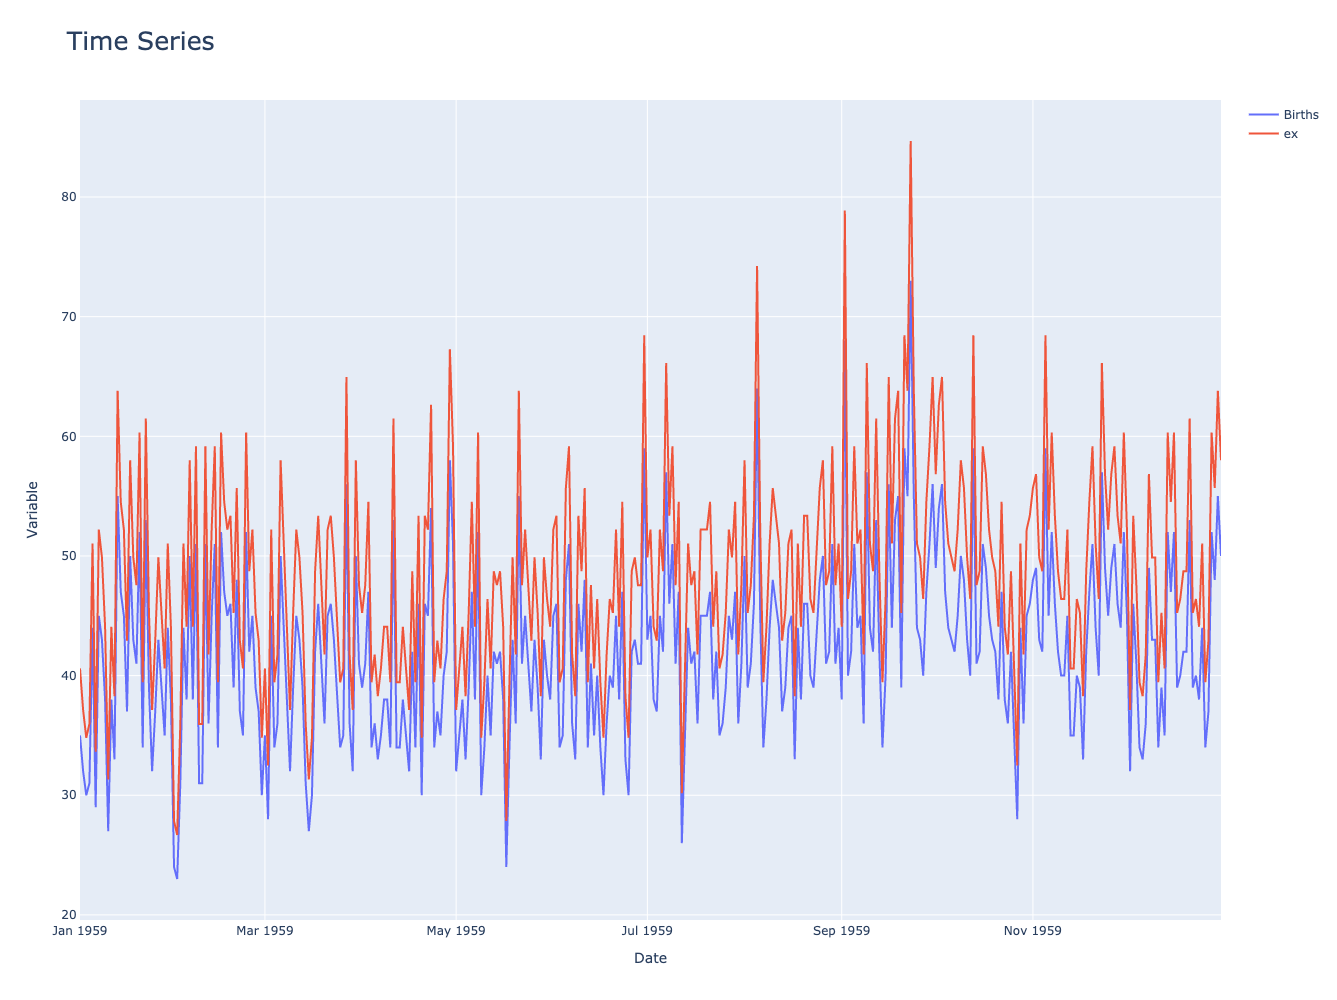

In [5]:
plot_time_series(df, cols=["Births", "ex"] , viz_backend="plotly")

# Plot interactive time series

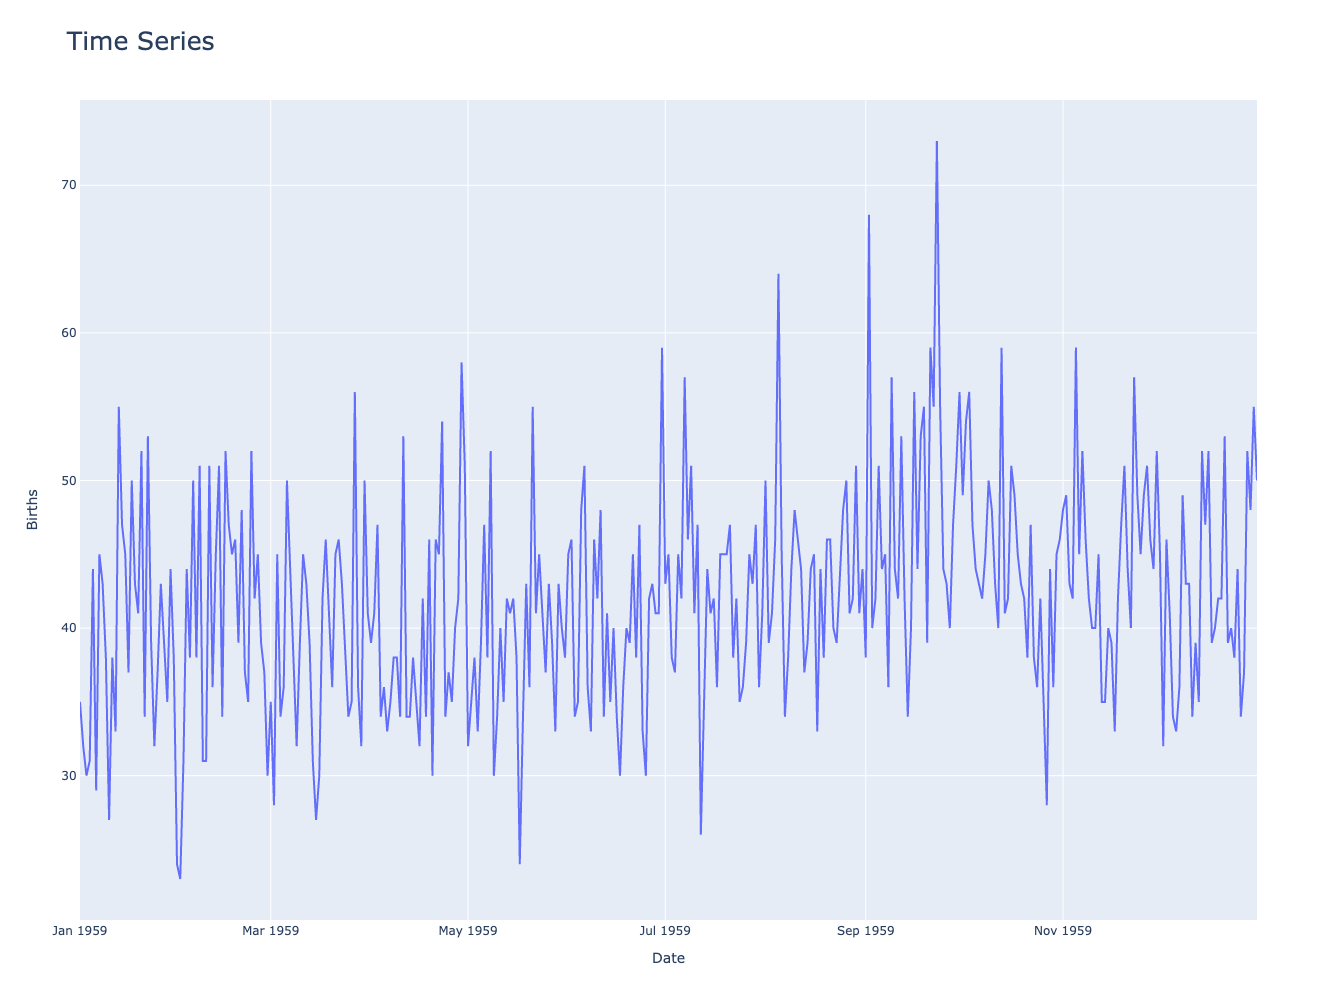

In [6]:
plot_time_series(df, cols="Births", viz_backend="plotly" )

## Plot decomposition

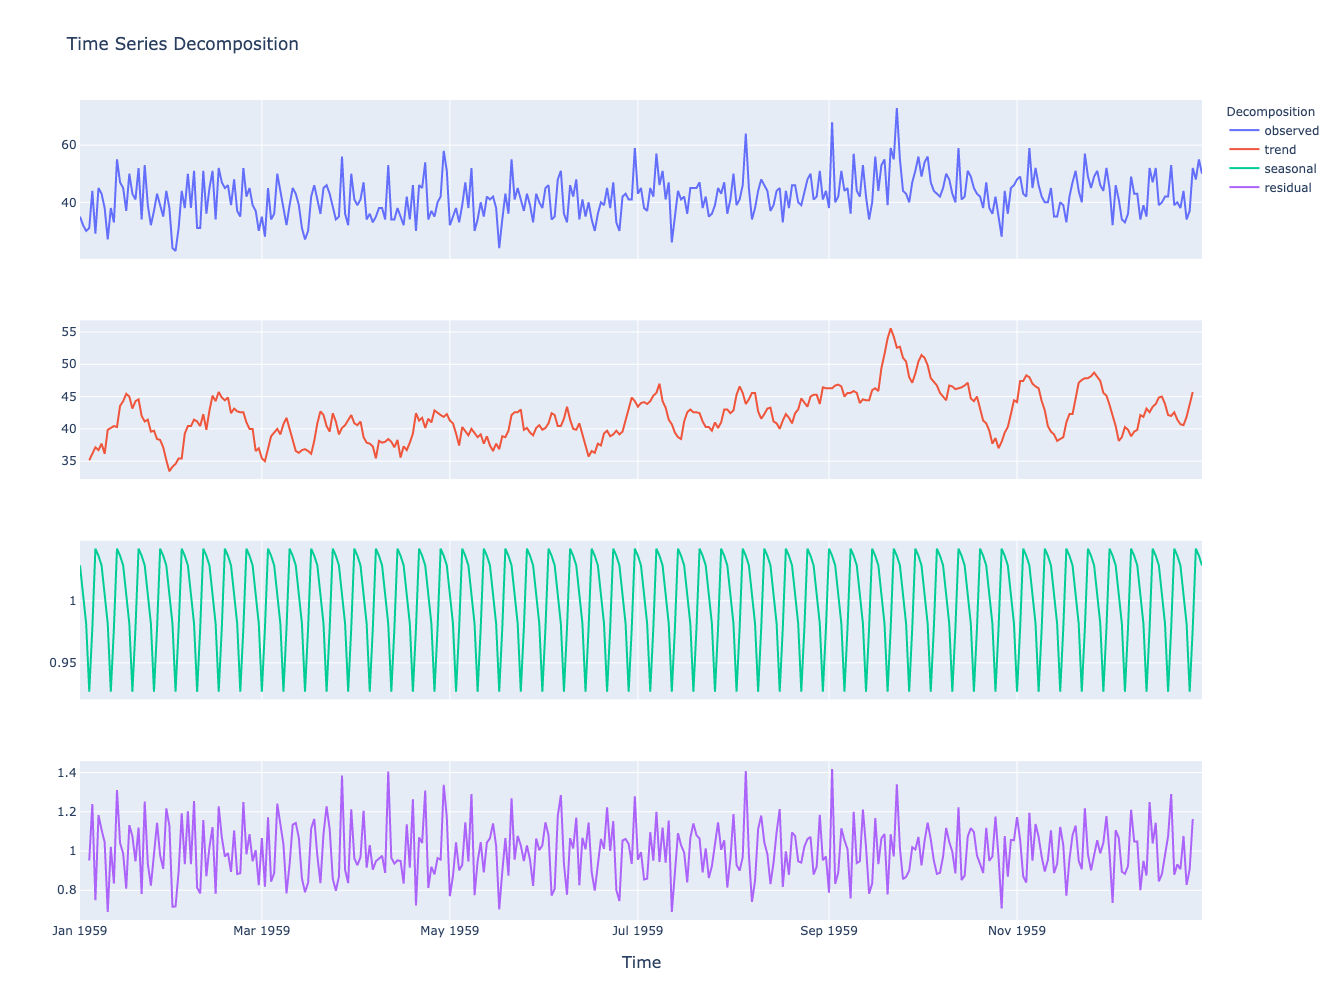

In [7]:
plot_time_series(df, cols="Births", decompose=True, viz_backend="plotly"  )


## Perform Stationarity Tests

In [8]:
stationarity_test(df, col='Births', test="dickey-fuller")

,stats
Test Statistic,-4.808291
p-value,0.000052
Lags Used,6.000000
Number of Observations Used,358.000000
Critical Value (1%),-3.448749
Critical Value (5%),-2.869647
Critical Value (10%),-2.571089


In [9]:
stationarity_test(df, col='Births', test="kpss")

/Users/richardtruong-chau/miniconda3/envs/test-env/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/Users/richardtruong-chau/miniconda3/envs/test-env/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning:

p-value is smaller than the indicated p-value



,stats
Test Statistic,1.116991
p-value,0.010000
Lags Used,17.000000
Critical Value (10%),0.347000
Critical Value (5%),0.463000
Critical Value (2.5%),0.574000
Critical Value (1%),0.739000


## Plot ACF 

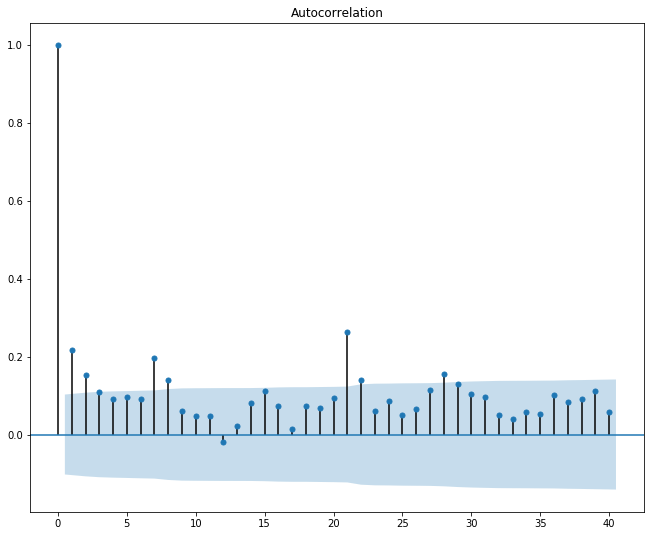

In [10]:
# Use seaborn by default
plot_autocorrelation(df, col='Births', plot_type="acf");

/Users/richardtruong-chau/miniconda3/envs/test-env/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



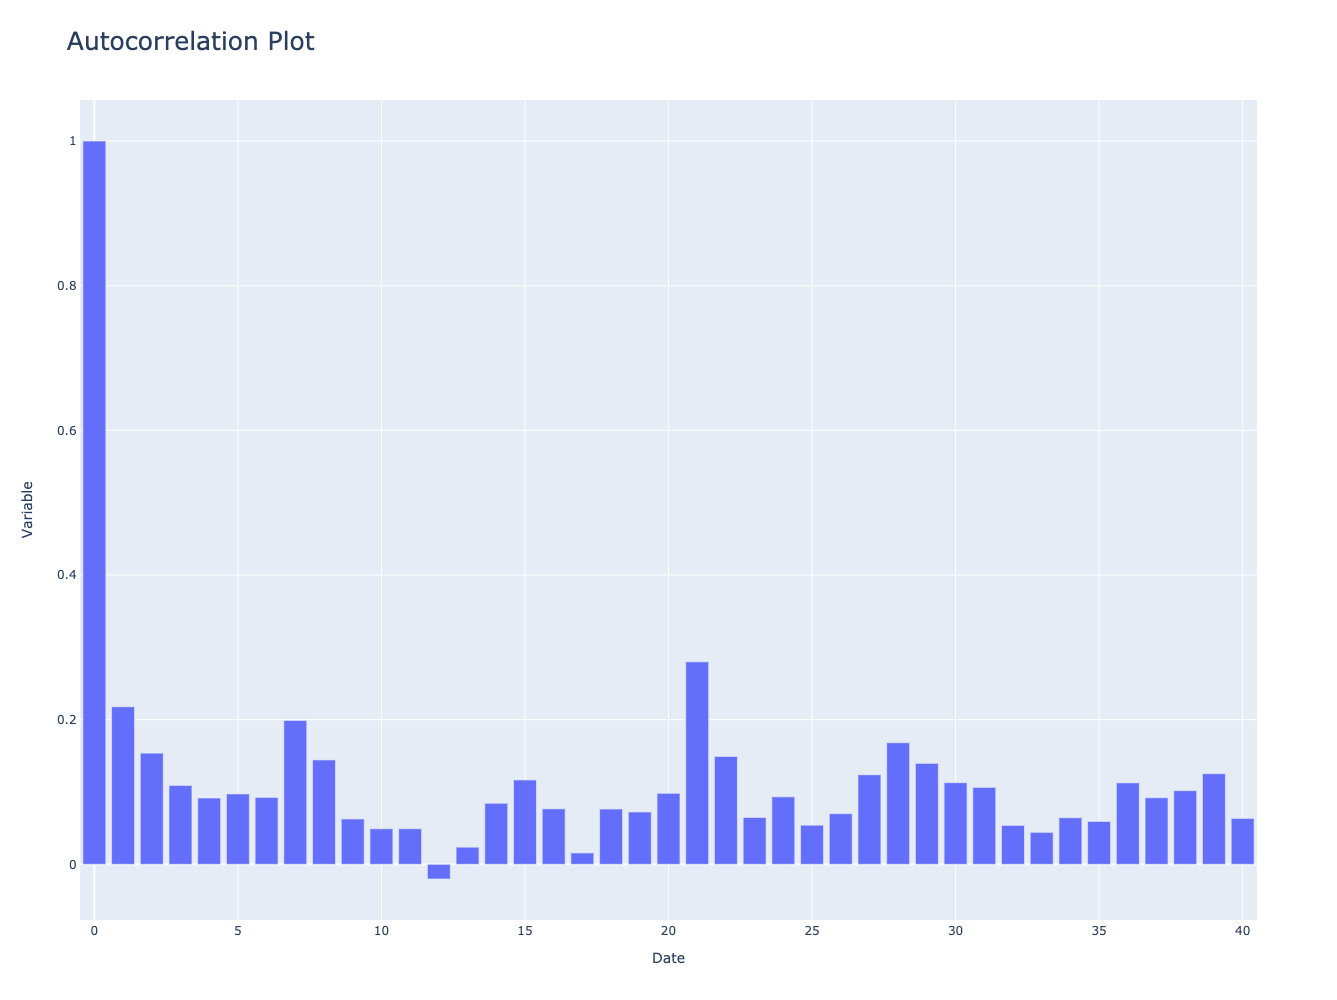

In [13]:
# specify viz_backend
plot_autocorrelation(df, col="Births", viz_backend="plotly", plot_type="acf")

## Plot PACF

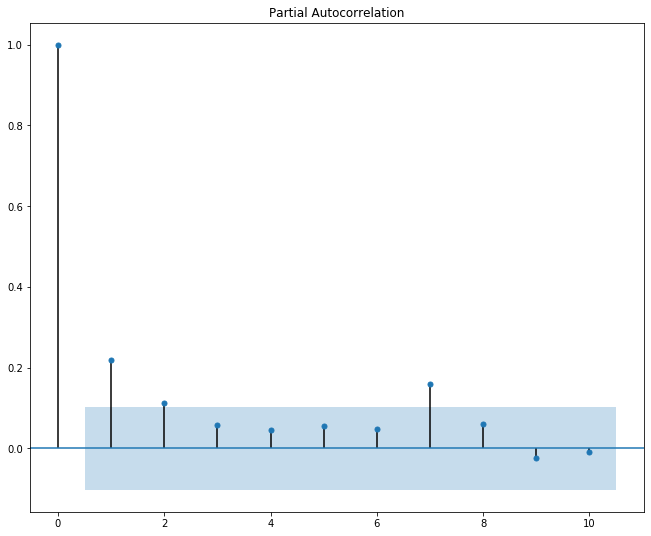

In [15]:
plot_autocorrelation(df, col="Births", plot_type="pacf", n_lags=10);

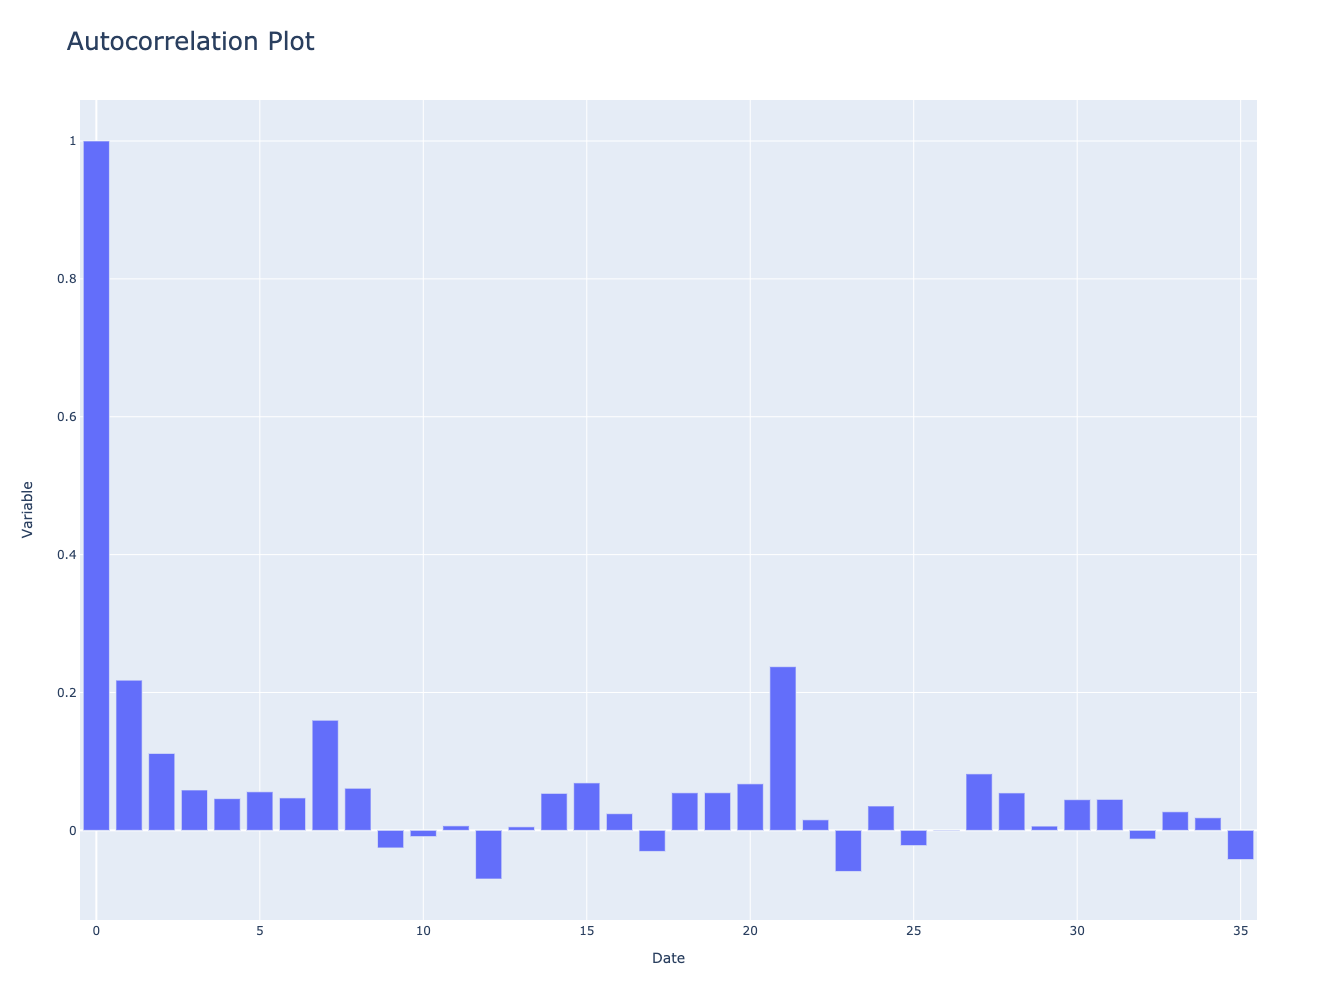

In [14]:
plot_autocorrelation(df, col="Births", plot_type="pacf", viz_backend="plotly", n_lags=35)